# matplotlib Assignment

Problem 1:
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [1]:
from matplotlib import pyplot as plt
from scipy import optimize
import numpy as np

In [2]:
Max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]) 
Min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]) 

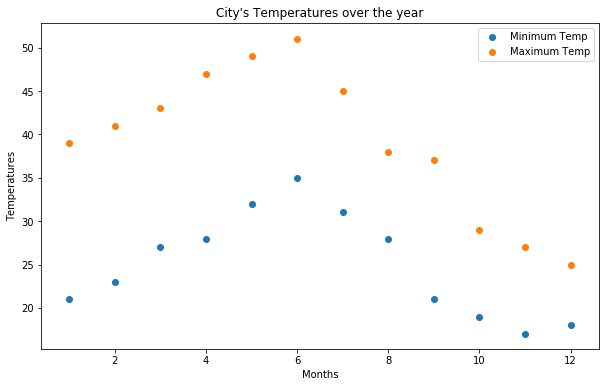

In [3]:
months = np.arange(1,len(Max_temp)+1)
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)
axes.scatter(months, Min_temp, label = "Minimum Temp")
axes.scatter(months, Max_temp, label = "Maximum Temp")
axes.set_xlabel('Months')
axes.set_ylabel('Temperatures')
axes.set_title("City's Temperatures over the year")
plt.legend()
plt.show()

In [4]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [5]:
res_max, cov_max = optimize.curve_fit(yearly_temps, months, Max_temp)
res_min, cov_min = optimize.curve_fit(yearly_temps, months, Min_temp)
print(f"res_max:\n{res_max},\ncov_max:\n{cov_max},\n\n\nres_min:\n{res_min},\ncov_min:\n{cov_min}")

res_max:
[ 39.25       -11.01878021   0.97111096],
cov_max:
[[ 7.38600934e-01 -5.32715571e-09 -1.27644772e-18]
 [-5.32715571e-09  1.47720191e+00  3.53954551e-10]
 [-1.27644772e-18  3.53954551e-10  4.43788472e-02]],


res_min:
[25.          7.86539575  6.48952563],
cov_min:
[[1.92715722e-01 1.94722183e-09 3.47876127e-10]
 [1.94722183e-09 3.85431443e-01 1.91982798e-09]
 [3.47876127e-10 1.91982798e-09 2.27252555e-02]]


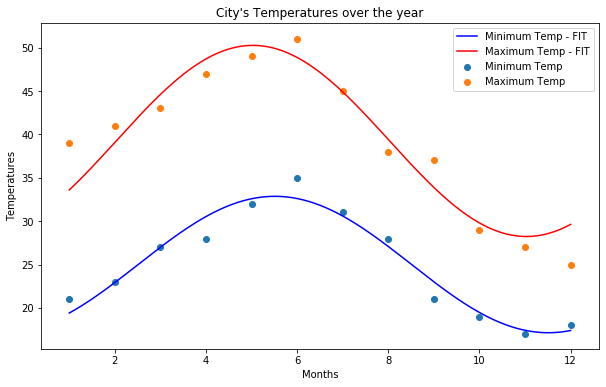

In [6]:
months = np.arange(1,len(Max_temp)+1)
days = np.linspace(1,12,365)
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)
axes.scatter(months, Min_temp, label = "Minimum Temp")
axes.plot(days, yearly_temps(days, *res_min), 'b-', label = "Minimum Temp - FIT" )
axes.scatter(months, Max_temp, label = "Maximum Temp")
axes.plot(days, yearly_temps(days, *res_max), 'r-', label = "Maximum Temp - FIT")
axes.set_xlabel('Months')
axes.set_ylabel('Temperatures')
axes.set_title("City's Temperatures over the year")
plt.legend()
plt.show()

Problem 2:
    Charts to plot from titanic data: 

In [7]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv" 
titanic = pd.read_csv(url)

In [8]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion 

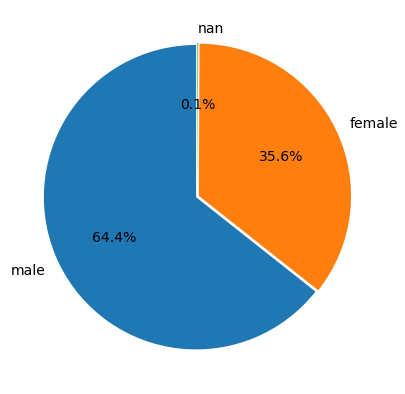

In [9]:
figure=plt.figure(figsize=(10,7))
axes =  figure.add_subplot(111)
list1=titanic['sex'].value_counts(dropna = False)
pie = axes.pie(list1, labels = list1.index, autopct='%1.1f%%', textprops={'fontsize': 14}, explode = [0.01,0.01,0.01], startangle=90)
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

In [10]:
temp_df = titanic.sex.apply(lambda x: 0 if(x =='female') else 1)
temp_df

0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309    1
Name: sex, Length: 1310, dtype: int64

In [11]:
pd.Categorical(titanic['sex'])

[female, male, female, male, female, ..., female, male, male, male, NaN]
Length: 1310
Categories (2, object): [female, male]

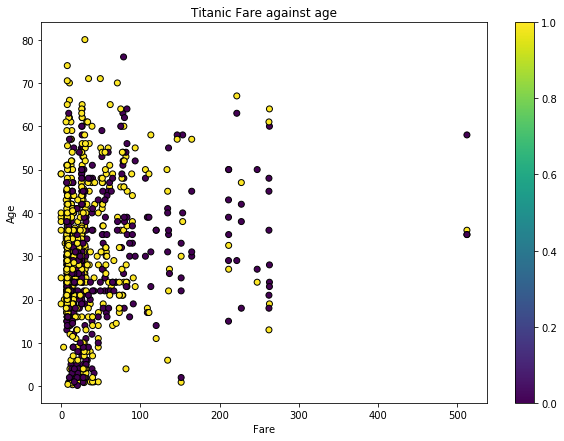

In [12]:
figure=plt.figure(figsize=(10,7))
axes =  figure.add_subplot(111)
dots = axes.scatter(titanic.fare, titanic.age, c=temp_df, edgecolor='k')
colorbar = plt.colorbar(dots)
axes.set_title("Titanic Fare against age")
axes.set_xlabel("Fare")
axes.set_ylabel("Age")
plt.show()